# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [7205]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [7206]:
df = pd.read_csv('data/food_production.csv')

### A note on this dataset and its origin:
This data set can be found in its original form [here](https://www.kaggle.com/selfvivek/environment-impact-of-food-production).
There is some additional documentation and some analysis that was done [here](https://ourworldindata.org/environmental-impacts-of-food). I did my best to avoid the analysis that was already covered in the report, but it is interesting stuff. I would recommend a read if you are interested in the environment or sustainable food production.

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

### 1. Show 5 rows, selected at random:
Here I am showing a sample of this data. There are a few things to note here. One is that the data needs to be cleaned up a little bit, and that there are some empty values and inconsistencies. As a quick guide, the data is organized by a food type, shown in the **Food Product** column. There is some information about CO2 emissions in the production of the food object, and then some information about things like Eutrophication (nutrient runoff into bodies of water), land use, and freshwater use. 

In [7207]:
df.sample(5)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
14,Tofu,1.0,0.0,0.5,0.8,0.2,0.2,0.3,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Peas,0.0,0.0,0.7,0.0,0.1,0.0,0.0,0.8,2.173410,...,178.487849,396.6,0.283237,0.441044,2.156069,7.46,3.357336,27948.2,12577.94779,NaN
33,Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6,110.406593,...,727.783350,1451.2,36.439560,49.889669,119.490842,326.21,163.595787,34732.5,17418.50552,12722.52747
11,Nuts,-2.1,0.0,2.1,0.0,0.1,0.1,0.0,0.2,3.113821,...,2531.414574,4133.8,0.069919,0.263319,2.107317,12.96,7.936314,229889.8,140777.58730,37380.45528


### 2. Show each column name and their data types
Here is each column. As I will address later on, I will not be using some of these columns. I am most interested in the first 9 columns, which lack empty values and tell an interesting story about the impact of food production. 

In [7208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

### 3. Show unique features of the data
There are a few interesting things about this data. One, it very clearly shows that animal-based sources of food are generally much more impactful on the environment and costly to resources to produce. However, there are some interesting outliers, as seen with Coffee and Dark Chocolate. They are quite costly to produce, as you can see below.

This data also has a few different units of measurement that are important to note. The most frequent is kg of something per kg of food product, but there is also measurement by kcals and 100g of protein.

In [7209]:
df.loc[31:32]

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
31,Coffee,3.7,0.0,10.4,0.6,0.1,1.6,0.1,16.5,197.357143,...,32.375,25.9,50.946429,35.6625,38.607143,21.62,27.025,337.0,421.25,601.785714
32,Dark Chocolate,14.3,0.0,3.7,0.2,0.1,0.4,0.0,18.7,16.843327,...,1081.200,540.6,9.023211,93.3000,13.338491,68.96,137.920,2879.2,5758.40,556.905222


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

### First, I want to remove all columns that will not be necessary in our analysis. 

This includes measures by 1000kcal, because I am not interested in energy sources in this analysis. I am also removing the columns that have to do with scarcity-weighted water use because I was unable to find appropriate documentation in the dataset about its implications and the processes in calculating this number to perform any analysis on it. 

In [7210]:
df = df.drop(df.columns[[9, 12, 15, 17, 20, 21, 22]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 16 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Food product                                                           43 non-null     object 
 1   Land use change                                                        43 non-null     float64
 2   Animal Feed                                                            43 non-null     float64
 3   Farm                                                                   43 non-null     float64
 4   Processing                                                             43 non-null     float64
 5   Transport                                                              43 non-null     float64
 6   Packging                                                               43 non-null     float

### I also want to rename the columns to fix typos and make everything a little clearer, adding units and standard title format.

In [7211]:
df.columns = ['Food Product', 'Land Use Change (Kg CO2)','Animal Feed (Kg CO2)','Farm (Kg CO2)','Processing (Kg CO2)','Transport (Kg CO2)', 'Packaging (Kg CO2)', 'Retail (Kg CO2)', 'Total Emissions (Kg CO2)', 'Eutrophying Emissions (gPO₄eq per kilogram)','Eutrophying Emissions (gPO₄eq per 100 grams protein)','Freshwater Withdrawals (liters per 100g protein)','Freshwater Withdrawals (liters per kilogram)', 'Greenhouse Gas Emissions (kgCO₂eq per 100g protein)','Land Use (m² per kilogram)','Land Use (m² per 100g protein)']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Food Product                                          43 non-null     object 
 1   Land Use Change (Kg CO2)                              43 non-null     float64
 2   Animal Feed (Kg CO2)                                  43 non-null     float64
 3   Farm (Kg CO2)                                         43 non-null     float64
 4   Processing (Kg CO2)                                   43 non-null     float64
 5   Transport (Kg CO2)                                    43 non-null     float64
 6   Packaging (Kg CO2)                                    43 non-null     float64
 7   Retail (Kg CO2)                                       43 non-null     float64
 8   Total Emissions (Kg CO2)                              43 non-n

### Next, I want to round all remaining columns to one decimal point, so that all numbers are consistently documented. 

Since one decimal point is the least accurate calculation used in the data, I will be cutting all data to match this point. 

In [7212]:
df = df.round(1)
df.sample(5)

,Food Product,Land Use Change (Kg CO2),Animal Feed (Kg CO2),Farm (Kg CO2),Processing (Kg CO2),Transport (Kg CO2),Packaging (Kg CO2),Retail (Kg CO2),Total Emissions (Kg CO2),Eutrophying Emissions (gPO₄eq per kilogram),Eutrophying Emissions (gPO₄eq per 100 grams protein),Freshwater Withdrawals (liters per 100g protein),Freshwater Withdrawals (liters per kilogram),Greenhouse Gas Emissions (kgCO₂eq per 100g protein),Land Use (m² per kilogram),Land Use (m² per 100g protein)
16,Palm Oil,3.1,0.0,2.1,1.3,0.2,0.9,0.0,7.6,10.7,NaN,NaN,6.4,NaN,2.4,NaN
14,Tofu,1.0,0.0,0.5,0.8,0.2,0.2,0.3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Onions & Leeks,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,3.2,24.9,110.0,14.3,3.8,0.4,3.0
17,Sunflower Oil,0.1,0.0,2.1,0.2,0.2,0.9,0.0,3.5,50.7,NaN,NaN,1007.9,NaN,17.7,NaN
39,Cheese,4.5,2.3,13.1,0.7,0.1,0.2,0.3,21.2,98.4,44.6,2538.6,5605.2,10.8,87.8,39.8


### Next, I want to add a column for category and type in the data. This will make it easier to group by certain types of food.

Category will be broken down into the following basic categories: proteins, grains, vegetables, fruits, nuts, oils, and other. This is a broad generalization, but it is helpful in categorizing where different foods fit in a typical diet. 

Origin will be either plant-based (PB), or animal-based (AB). This will help make distinctions about various impacts by the way the food is produced.

In [7213]:
category = ['grain','grain','grain','grain','grain','vegetable','vegetable','other','other','other','vegetable','nut','nut','other','protein','oil','oil','oil','oil','oil','vegetable','vegetable','vegetable','vegetable','vegetable','fruit','fruit','fruit','fruit','other','fruit','other','other','protein','protein','protein','protein','protein','other','other','protein','protein','protein']
df['Category'] = category
origin = ['PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','PB','AB','AB','AB','AB','AB','AB','AB','AB','AB','AB']
df['Origin'] = origin
df.sample(5)

,Food Product,Land Use Change (Kg CO2),Animal Feed (Kg CO2),Farm (Kg CO2),Processing (Kg CO2),Transport (Kg CO2),Packaging (Kg CO2),Retail (Kg CO2),Total Emissions (Kg CO2),Eutrophying Emissions (gPO₄eq per kilogram),Eutrophying Emissions (gPO₄eq per 100 grams protein),Freshwater Withdrawals (liters per 100g protein),Freshwater Withdrawals (liters per kilogram),Greenhouse Gas Emissions (kgCO₂eq per 100g protein),Land Use (m² per kilogram),Land Use (m² per 100g protein),Category,Origin
37,Poultry Meat,2.5,1.8,0.7,0.4,0.3,0.2,0.2,6.1,48.7,28.1,381.1,660.0,5.7,12.2,7.1,protein,AB
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,17.1,8.0,203.5,435.7,0.8,15.6,7.3,other,PB
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,grain,PB
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,11.2,8.6,371.1,482.4,1.9,7.6,5.8,grain,PB
19,Olive Oil,-0.4,0.0,4.3,0.7,0.5,0.9,0.0,6.0,37.3,NaN,NaN,2141.8,NaN,26.3,NaN,oil,PB


### A note on missing data:

There are some missing values in the data. I am choosing to leave these data values blank so that they do not interfere with any calculations. 

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

### 1. Grouping by Animal-based origin and protein (Category) and sorting by total CO2 emissions per KG

In [7214]:
df_ab = df[(df.Category == "protein") & (df.Origin == "AB")]
df_ab.sort_values(by='Total Emissions (Kg CO2)', ascending=False)

,Food Product,Land Use Change (Kg CO2),Animal Feed (Kg CO2),Farm (Kg CO2),Processing (Kg CO2),Transport (Kg CO2),Packaging (Kg CO2),Retail (Kg CO2),Total Emissions (Kg CO2),Eutrophying Emissions (gPO₄eq per kilogram),Eutrophying Emissions (gPO₄eq per 100 grams protein),Freshwater Withdrawals (liters per 100g protein),Freshwater Withdrawals (liters per kilogram),Greenhouse Gas Emissions (kgCO₂eq per 100g protein),Land Use (m² per kilogram),Land Use (m² per 100g protein),Category,Origin
33,Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6,301.4,151.2,727.8,1451.2,49.9,326.2,163.6,protein,AB
35,Lamb & Mutton,0.5,2.4,19.5,1.1,0.5,0.3,0.2,24.5,97.1,48.5,900.9,1802.8,19.9,369.8,184.8,protein,AB
34,Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1,365.3,185.1,1375.0,2714.3,16.9,43.2,21.9,protein,AB
42,Shrimps (farmed),0.2,2.5,8.4,0.0,0.2,0.3,0.2,11.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,protein,AB
36,Pig Meat,1.5,2.9,1.7,0.3,0.3,0.3,0.2,7.2,76.4,47.2,1109.9,1795.8,7.6,17.4,10.7,protein,AB
37,Poultry Meat,2.5,1.8,0.7,0.4,0.3,0.2,0.2,6.1,48.7,28.1,381.1,660.0,5.7,12.2,7.1,protein,AB
41,Fish (farmed),0.5,0.8,3.6,0.0,0.1,0.1,0.0,5.1,235.1,103.1,1618.6,3691.3,6.0,8.4,3.7,protein,AB
40,Eggs,0.7,2.2,1.3,0.0,0.1,0.2,0.0,4.5,21.8,19.6,520.6,577.7,4.2,6.3,5.7,protein,AB


### 2. Comparing general statistics from plant based protein to animal-based (an average). As you will note here, there is not much data on plant-based protein due to a lack of other sources in the data (i.e. legumes, soy products, etc.)

In [7215]:
df_protein = df[df["Category"] == 'protein']
df_protein.groupby("Origin")['Total Emissions (Kg CO2)'].describe()

,count,mean,std,min,25%,50%,75%,max
Origin,,,,,,,,
AB,8.0,17.4875,18.615158,4.5,5.85,9.5,21.95,59.6
PB,1.0,3.0000,NaN,3.0,3.00,3.0,3.00,3.0


### 3. Showing statistics for emissions per category. Note that mixed is not a set category, and contains some unusual food types. This is because of the outliers I talked about above. However, the "other" category will be explored in more depth later.

In [7216]:
df.groupby("Category")['Total Emissions (Kg CO2)'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
fruit,5.0,0.640000,0.343511,0.3,0.30,0.70,0.800,1.1
grain,5.0,1.840000,1.225969,1.1,1.10,1.40,1.600,4.0
nut,2.0,1.300000,1.555635,0.2,0.75,1.30,1.850,2.4
oil,5.0,5.360000,1.735800,3.5,3.70,6.00,6.000,7.6
other,9.0,7.466667,8.600145,1.0,1.40,2.60,16.500,21.2
protein,9.0,15.877778,18.070126,3.0,5.10,7.20,21.100,59.6
vegetable,8.0,0.612500,0.394380,0.3,0.30,0.45,0.825,1.4


### 4. Showing crops (vegetables, fruits, nuts, grains) ranked by freshwater water use by kg of product, ranked in descending order. I am only listing the top 5 most impactful crops.

In [7217]:
df_crops = df[(df.Category == "vegetable") | (df.Category == "grain") | (df.Category == "fruit") | (df.Category == "nut")]
df_crops.sort_values(by='Freshwater Withdrawals (liters per kilogram)', ascending=False).head(5)

,Food Product,Land Use Change (Kg CO2),Animal Feed (Kg CO2),Farm (Kg CO2),Processing (Kg CO2),Transport (Kg CO2),Packaging (Kg CO2),Retail (Kg CO2),Total Emissions (Kg CO2),Eutrophying Emissions (gPO₄eq per kilogram),Eutrophying Emissions (gPO₄eq per 100 grams protein),Freshwater Withdrawals (liters per 100g protein),Freshwater Withdrawals (liters per kilogram),Greenhouse Gas Emissions (kgCO₂eq per 100g protein),Land Use (m² per kilogram),Land Use (m² per 100g protein),Category,Origin
11,Nuts,-2.1,0.0,2.1,0.0,0.1,0.1,0.0,0.2,19.2,11.7,2531.4,4133.8,0.3,13.0,7.9,nut,PB
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,35.1,49.4,3166.8,2248.4,6.3,2.8,3.9,grain,PB
12,Groundnuts,0.4,0.0,1.4,0.4,0.1,0.1,0.0,2.4,14.1,5.4,707.5,1852.3,1.2,9.1,3.5,nut,PB
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,11.2,8.6,371.1,482.4,1.9,7.6,5.8,grain,PB
28,Berries & Grapes,0.0,0.0,0.7,0.0,0.2,0.2,0.0,1.1,6.1,61.2,4196.0,419.6,15.3,2.4,24.1,fruit,PB


### 5. Showing foods in the "other" category ranked by Emissions impact. Here you can see the items in this category more clearly, and the differences between them.

In [7218]:
df_land = df[df.Category == "other"]
df_land.sort_values(by='Total Emissions (Kg CO2)', ascending=False)

,Food Product,Land Use Change (Kg CO2),Animal Feed (Kg CO2),Farm (Kg CO2),Processing (Kg CO2),Transport (Kg CO2),Packaging (Kg CO2),Retail (Kg CO2),Total Emissions (Kg CO2),Eutrophying Emissions (gPO₄eq per kilogram),Eutrophying Emissions (gPO₄eq per 100 grams protein),Freshwater Withdrawals (liters per 100g protein),Freshwater Withdrawals (liters per kilogram),Greenhouse Gas Emissions (kgCO₂eq per 100g protein),Land Use (m² per kilogram),Land Use (m² per 100g protein),Category,Origin
39,Cheese,4.5,2.3,13.1,0.7,0.1,0.2,0.3,21.2,98.4,44.6,2538.6,5605.2,10.8,87.8,39.8,other,AB
32,Dark Chocolate,14.3,0.0,3.7,0.2,0.1,0.4,0.0,18.7,87.1,174.2,1081.2,540.6,93.3,69.0,137.9,other,PB
31,Coffee,3.7,0.0,10.4,0.6,0.1,1.6,0.1,16.5,110.5,138.2,32.4,25.9,35.7,21.6,27.0,other,PB
38,Milk,0.5,0.2,1.5,0.1,0.1,0.1,0.3,2.8,10.6,32.3,1903.6,628.2,9.5,9.0,27.1,other,AB
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,16.9,NaN,NaN,620.1,NaN,2.0,NaN,other,PB
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,17.1,8.0,203.5,435.7,0.8,15.6,7.3,other,PB
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,5.4,NaN,NaN,217.7,NaN,1.8,NaN,other,PB
29,Wine,-0.1,0.0,0.6,0.1,0.1,0.7,0.0,1.4,4.6,NaN,NaN,78.9,NaN,1.8,NaN,other,PB
13,Soymilk,0.2,0.0,0.1,0.2,0.1,0.1,0.3,1.0,1.1,NaN,NaN,27.8,NaN,0.7,NaN,other,PB


### 6. Here I have grouped columns by stage of production and taken the mean of each column. You can see that farming is the most generally impactful stage of production.

In [7219]:
cols = df[["Land Use Change (Kg CO2)","Animal Feed (Kg CO2)","Farm (Kg CO2)","Processing (Kg CO2)","Transport (Kg CO2)","Packaging (Kg CO2)","Retail (Kg CO2)"]]
#cols = df[(df["Land use change"]) | (df["Animal Feed"])]
#df.groupby('Food product')['Land use change', 'Animal Feed', 'Farm'].mean(axis=1) 
print('Averages from each stage of food production:')
cols.mean()

Averages from each stage of food production:


Land Use Change (Kg CO2)    1.260465
Animal Feed (Kg CO2)        0.453488
Farm (Kg CO2)               3.469767
Processing (Kg CO2)         0.253488
Transport (Kg CO2)          0.195349
Packaging (Kg CO2)          0.269767
Retail (Kg CO2)             0.069767
dtype: float64

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

### 1. Here is a horizontal bar chart of animal-based protein by their total emissions. You can see that beef is by far the most impactful food to produce in terms of CO2 emissions.

Origin
AB    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Total Emissions (Kg CO2), dtype: object

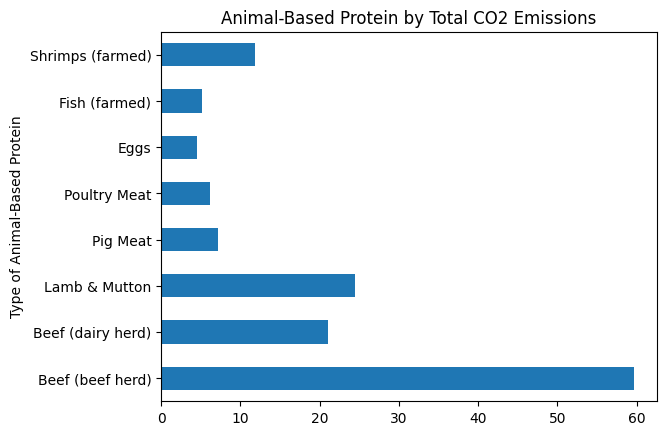

In [7220]:
setup_one = df[(df.Category == "protein") & (df.Origin == "AB")].set_index('Food Product')
group_one = setup_one.groupby('Origin')['Total Emissions (Kg CO2)']
group_one.plot.barh(xlabel='Type of Animal-Based Protein',ylabel='CO2 emission per kg of product',title="Animal-Based Protein by Total CO2 Emissions")

### 2. Next, I made a bar chart of each category of food product, divided by origin - AB or PB, by total CO2 emissions.  You can see more clearly here the differences between animal protein and the various other categories.


<AxesSubplot:title={'center':'Categories by Origin, Emissions per KG of product'}, xlabel='Category,Origin', ylabel='CO2 emission per kg of product'>

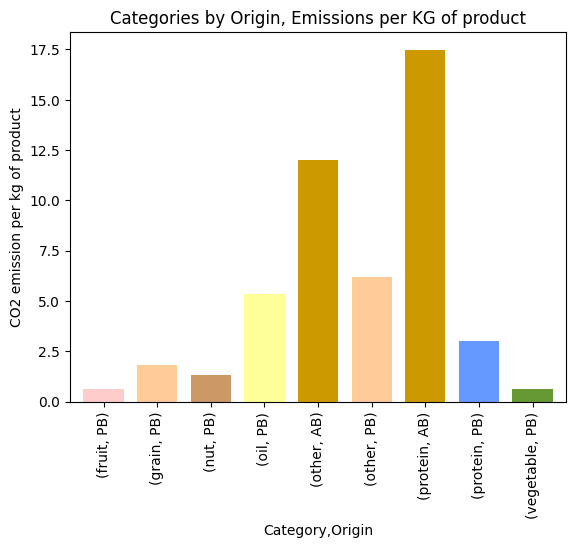

In [7221]:
group_two = df.groupby(["Category","Origin"])['Total Emissions (Kg CO2)'].mean()
#used color parameter to set unique colors for easier reading - in hex codes
group_two.plot.bar(ylabel='CO2 emission per kg of product',stacked=True,width=.75,color=['#FFCCCC', '#FFCC99', '#CC9966', '#FFFF99', '#CC9900','#FFCC99','#CC9900','#6699FF','#669933'],title="Categories by Origin, Emissions per KG of product")

### 3. Here I made a scatterplot of land use and water use, respectfully. This shows where the outliers are in terms of land and water use, and details more clearly that there are certain foods which are much more impactful than others. 

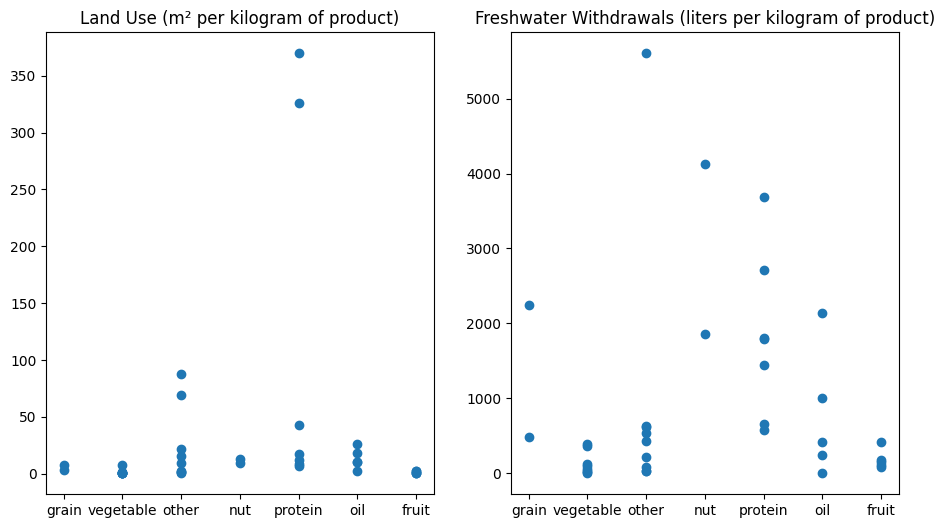

In [7222]:
# from matplotlib on using subplots - https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py
land = df["Land Use (m² per kilogram)"]
water = df["Freshwater Withdrawals (liters per kilogram)"]
activity = df["Category"]

fig, axs = plt.subplots(1,2, figsize=(11, 6))
axs[0].scatter(activity, land, label="land")
axs[0].set_title('Land Use (m² per kilogram of product)')
axs[1].scatter(activity, water, label="water")
axs[1].set_title('Freshwater Withdrawals (liters per kilogram of product)')

plt.show()

### 4. Next, I made a pie chart that shows the percentage of each stage of production, on average, that contributes to the overall emisssions of a given food product.

average distribution of emissions in the different stages of food production


([<matplotlib.patches.Wedge at 0x7f83fde91850>,
 [Text(0.8669222351533424, 0.6770862856362793, 'Land Use'),
  Text(0.006728257689044983, 1.0999794227841129, 'Animal Feed'),
  Text(-0.9721672015801136, -0.5146755601074245, 'Farm'),
  Text(0.8440891473396723, -0.7053463768556447, 'Processing'),
  Text(0.9856658247605264, -0.4883266139574531, 'Transport'),
  Text(1.0746009690454412, -0.2350165043706485, 'Packaging'),
  Text(1.0992592814570186, -0.04036127018070177, 'Retail')])

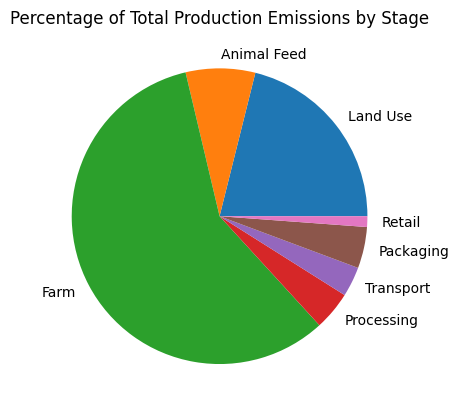

In [7223]:
labels = 'Land Use', 'Animal Feed', 'Farm', 'Processing','Transport','Packaging','Retail'
slices = cols.mean()
#pie chart information from official matplotlib documentation: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
print('average distribution of emissions in the different stages of food production')
fig, ax = plt.subplots()
ax.set_title('Percentage of Total Production Emissions by Stage')
ax.pie(slices, labels=labels)

### 5. Finally, I created an area plot that shows the relationship between the various stages of production, and that certain stages of production are not necessarily correlcated with each other. This also makes it more clear why Farming is the most impactful category - it is consistently the highest area in several places throughout the chart.

<AxesSubplot:title={'center':'Food Impact on Production by Product'}, xlabel='Food Products by Index'>

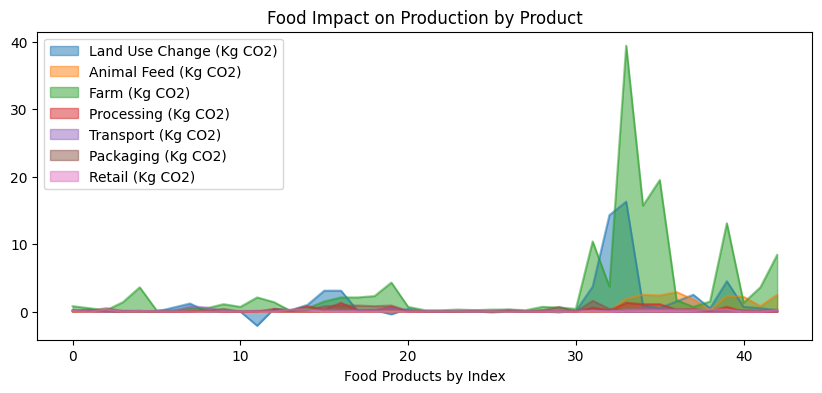

In [7224]:
cols = df[["Land Use Change (Kg CO2)","Animal Feed (Kg CO2)","Farm (Kg CO2)","Processing (Kg CO2)","Transport (Kg CO2)","Packaging (Kg CO2)","Retail (Kg CO2)"]]
cols.plot.area(stacked=False,figsize=(10,4),xlabel="Food Products by Index",title="Food Impact on Production by Product")

## Conclusion
Thank you for viewing my notebook on Food Production Impact. I hope you found this interesting, and learned some new things about the ways food production can impact the environment and contribute to global climate change and resource depletion. 

Completed by Catherine Benge.